## Lesson 14.2 - Plotting with Seaborn: Choosing color palettes

*Facsimile of [Seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).*

Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly. There are a number of great resources to learn about good techniques for using color in visualizations, I am partial to this [series of blog posts](http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/) from Rob Simmon and this [more technical paper](http://www.sandia.gov/~kmorel/documents/ColorMaps/ColorMapsExpanded.pdf). The matplotlib docs also now have a [nice tutorial](http://matplotlib.org/users/colormaps.html) that illustrates some of the perceptual properties of the built in colormaps.

Seaborn makes it easy to select and use color palettes that are suited to the kind of data you are working with and the goals you have in visualizing it.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

Building color palettes with `color_palette`
--------------------------------------------------

The most important function for working with discrete color palettes is `color_palette`. This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it's used internally by any function that has a `palette` argument (and in some cases for a `color` argument when multiple colors are needed).

`color_palette` will accept the name of any seaborn palette or matplotlib colormap (except `jet`, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Finally, calling `color_palette` with no arguments will return the current default color cycle.

A corresponding function, `set_palette`, takes the same arguments and will set the default color cycle for all plots. You can also use `color_palette` in a `with` statement to temporarily change the default palette (see below on palette contexts).

It is generally not possible to know what kind of color palette or colormap is best for a set of data without knowing about the characteristics of the data. Following that, we'll break up the different ways to use `color_palette` and other seaborn palette functions by the three general kinds of color palettes: *qualitative*, *sequential*, and *diverging*.


Qualitative color palettes
--------------------------

Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

After importing seaborn, you can run `sns.set()` to change the default color cycle to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

In [4]:
sns.set()

Then we can get the current palette using `sns.color_palette()` and display the color palette using `sns.palplot()`.

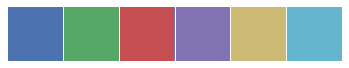

In [5]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are six variations of the default theme, called ``deep``, ``muted``, ``pastel``, ``bright``, ``dark``, and ``colorblind``.

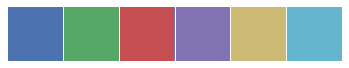

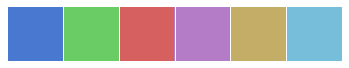

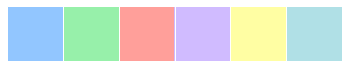

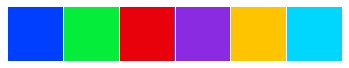

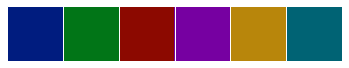

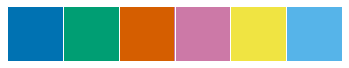

In [6]:
for variation in ['deep','muted', 'pastel', 'bright', 'dark', 'colorblind']:
    current_palette = sns.color_palette(variation)
    sns.palplot(current_palette)

Notice we haven't changed the default colormap yet:

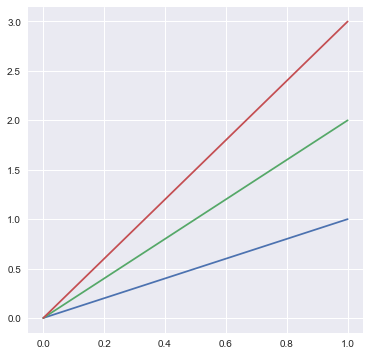

In [7]:
plt.plot([0, 1], [0, 1])
plt.plot([0, 1], [0, 2])
plt.plot([0, 1], [0, 3]);

We have to run `sns.set_palette()` to change the default colormap, to what `current_palette` was after the last for loop:

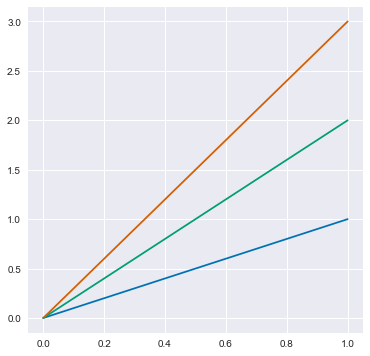

In [8]:
sns.set_palette(current_palette)

plt.plot([0, 1], [0, 1])
plt.plot([0, 1], [0, 2])
plt.plot([0, 1], [0, 3]);

### Using circular color systems

When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the ``hls`` color space, which is a simple transformation of RGB values.

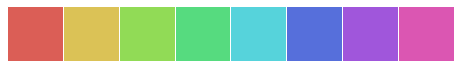

In [9]:
sns.palplot(sns.color_palette("hls", 8))

There is also the `hls_palette` function that lets you control the lightness and saturation of the colors.

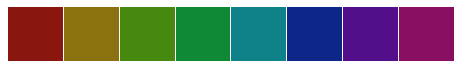

In [10]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

However, because of the way the human visual system works, colors that are even "intensity" in terms of their RGB levels won't necessarily look equally intense. [We perceive](http://en.wikipedia.org/wiki/Color_vision) yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the ``hls`` system.

To remedy this, seaborn provides an interface to the [husl](http://www.boronine.com/husl/) system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

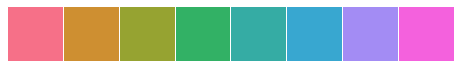

In [11]:
sns.palplot(sns.color_palette("husl", 8))

There is similarly a function called `husl_palette` that provides a more flexible interface to this system.

### Using categorical Color Brewer palettes

Another source of visually pleasing categorical palettes comes from the [Color Brewer](http://colorbrewer2.org/) tool (which also has sequential and diverging palettes, as we'll see below). These also exist as matplotlib colormaps, but they are not handled properly. In seaborn, when you ask for a qualitative Color Brewer palette, you'll always get the discrete colors, but this means that at a certain point they will begin to cycle.

A nice feature of the Color Brewer website is that it provides some guidance on which palettes are color blind safe. There are a variety of [kinds](http://en.wikipedia.org/wiki/Color_blindness) of color blindness, but the most common variant leads to difficulty distinguishing reds and greens. It's generally a good idea to avoid using red and green for plot elements that need to be discriminated based on color.

Use the free program [Color Oracle](http://www.colororacle.org) to see how people with color blindness see the world.

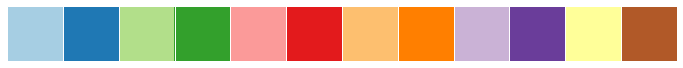

In [12]:
sns.palplot(sns.color_palette("Paired", 12))

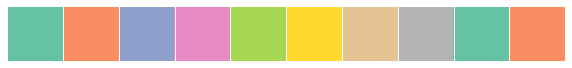

In [13]:
sns.palplot(sns.color_palette("Set2", 10))

To help you choose palettes from the Color Brewer library, there is the `choose_colorbrewer_palette` function. This function, which must be used in an IPython notebook, will launch an interactive widget that lets you browse the various options and tweak their parameters.

Of course, you might just want to use a set of colors you particularly like together. Because `color_palette` accepts a list of colors, this is easy to do.

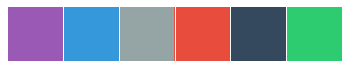

In [14]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### Using named colors from the xkcd color survey

A while back, [xkcd](http://xkcd.com/) ran a [crowdsourced effort](http://blog.xkcd.com/2010/05/03/color-survey-results/) to name random RGB colors. This produced a set of [954 named colors](http://xkcd.com/color/rgb/), which you can now reference in seaborn using the ``xkcd_rgb`` dictionary:

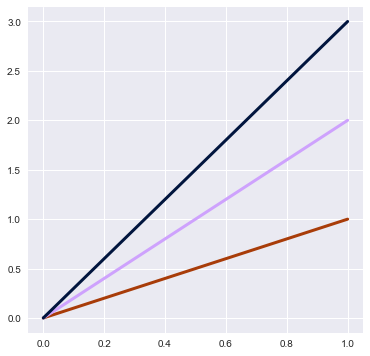

In [15]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["rust"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["lilac"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["navy"], lw=3)

If you want to spend some time picking colors, this [interactive visualization](http://www.luminoso.com/colors/) may be useful. In addition to pulling out single colors from the ``xkcd_rgb`` dictionary, you can also pass a list of names to the `xkcd_palette` function.

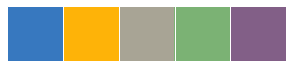

In [16]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

Sequential color palettes
-------------------------

The second major class of color palettes is called "sequential". This kind of color mapping is appropriate when data range from relatively low or unintersting values to relatively high or interesting values. Although there are cases where you will want discrete colors in a sequential palette, it's more common to use them as a colormap in functions like `kdeplot` or `corrplot` (along with similar matplotlib functions).

It's common to see colormaps like ``jet`` (or other rainbow palettes) used in this case, becuase the range of hues gives the impression of providing additional information about the data. However, colormaps with large hue shifts tend to introduce discontinuities that don't exist in the data, and our visual system isn't able to naturally map the rainbow to quantitative distinctions like "high" or "low". The result is that these visualizations end up being more like a puzzle, and they obscure patterns in the data rather than revealing them. The jet palette is [particularly bad](http://cresspahl.blogspot.com/2012/03/expanded-control-of-octaves-colormap.html) because the brightest colors, yellow and cyan, are used for intermediate data values. This has the effect of emphasizing uninteresting (and arbitrary) values while demphasizing the extremes.

For sequential data, it's better to use palettes that have at most a relatively subtle shift in hue accompanied by a large shift in brightness and saturation. This approach will naturally draw the eye to the relatively important parts of the data.

The Color Brewer library has a great set of these palettes. They're named after the dominant color (or colors) in the palette.

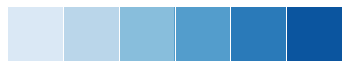

In [17]:
sns.palplot(sns.color_palette("Blues"))

Like in matplotlib, if you want the lightness ramp to be reversed, you can add a ``_r`` suffix to the palette name.

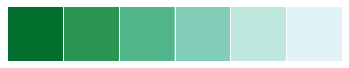

In [18]:
sns.palplot(sns.color_palette("BuGn_r"))

Seaborn also adds a trick that allows you to create "dark" palettes, which do not have as wide a dynamic range. This can be useful if you want to map lines or points sequentially, as brighter-colored lines might otherwise be hard to distinguish.

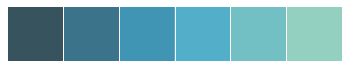

In [19]:
sns.palplot(sns.color_palette("GnBu_d"))

Remember that you may want to use the `choose_colorbrewer_palette` function to play with the various options, and you can set the ``as_cmap`` argument to ``True`` if you want the return value to be a colormap object that you can pass to seaborn or matplotlib functions.


### Sequential palettes with `cubehelix_palette`

The [cubehelix](http://www.mrao.cam.ac.uk/~dag/CUBEHELIX/) color palette system makes sequential palettes with a linear increase or decrease in brightness and some variation in hue. This means that the information in your colormap will be preserved when converted to black and white (for printing) or when viewed by a colorblind individual.

Matplotlib has the default cubehelix version built into it:

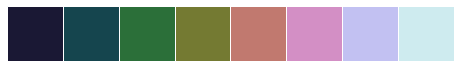

In [20]:
sns.palplot(sns.color_palette("cubehelix", 8))

Seaborn adds an interface to the cubehelix *system* so that you can make a variety of palettes that all have a well-behaved linear brightness ramp.

The default palette returned by the seaborn `cubehelix_palette` function is a bit different from the matplotlib default in that it does not rotate as far around the hue wheel or cover as wide a range of intensities. It also reverses the order so that more important values are darker:

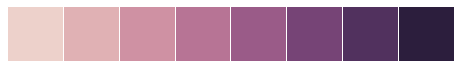

In [21]:
sns.palplot(sns.cubehelix_palette(8))

Other arguments to `cubehelix_palette` control how the palette looks. The two main things you'll change are the ``start`` (a value between 0 and 3) and ``rot``, or number of rotations (an arbitrary value, but probably within -1 and 1),

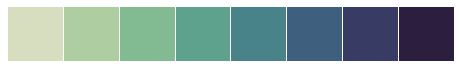

In [22]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

You can also control how dark and light the endpoints are and even reverse the ramp:

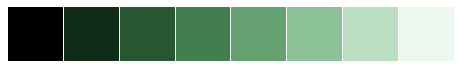

In [23]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

By default you just get a list of colors, like any other seaborn palette, but you can also return the palette as a colormap object that can be passed to seaborn or matplotlib functions using ``as_cmap=True``.

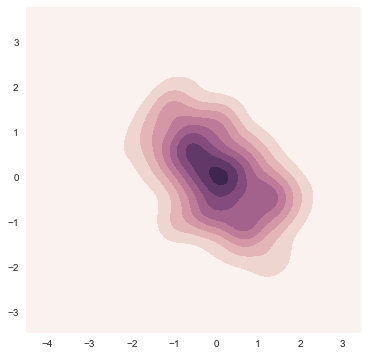

In [24]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True)

To help select good palettes or colormaps using this system, you can use the `choose_cubehelix_palette` function in a notebook to launch an interactive app that will let you play with the different parameters. Pass ``as_cmap=True`` if you want the function to return a colormap (rather than a list) for use in function like `hexbin`.

**Custom sequential palettes with `light_palette` and `dark_palette`**

For a simpler interface to custom sequential palettes, you can use `light_palette` or `dark_palette`, which are both seeded with a single color and produce a palette that ramps either from light or dark desaturated values to that color. These functions are also accompanied by the `choose_light_palette` and `choose_dark_palette` functions that launch interactive widgets to create these palettes.

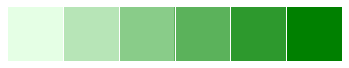

In [25]:
sns.palplot(sns.light_palette("green"))

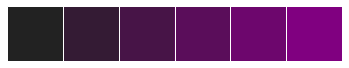

In [26]:
sns.palplot(sns.dark_palette("purple"))

These palettes can also be reversed.

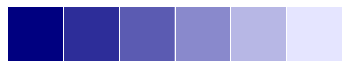

In [27]:
sns.palplot(sns.light_palette("navy", reverse=True))

They can also be used to create colormap objects rather than lists of colors.

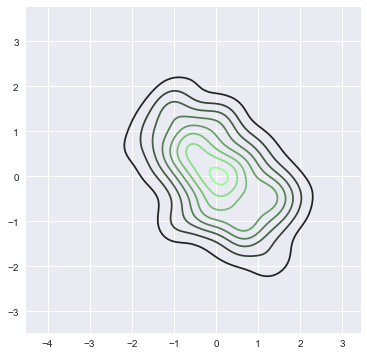

In [28]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

By default, the input can be any valid matplotlib color. Alternate interpretations are controlled by the ``input`` argument. Currently you can provide tuples in ``hls`` or ``husl`` space along with the default ``rgb``, and you can also seed the palette with any valid ``xkcd`` color.

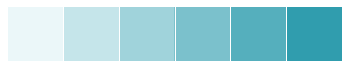

In [29]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

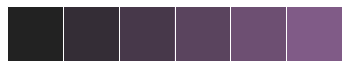

In [30]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

Note that the default input space for the interactive palette widgets is `husl`, which is different from the default for the function itself, but much more useful in this context.

Diverging color palettes
------------------------

The third class of color palettes is called "diverging". These are used for data where both large low and high values are interesting. There is also usually a well-defined midpoint in the data. For instance, if you are plotting changes in temperature from some baseline timepoint, it is best to use a diverging colormap to show areas with relative decreases and areas with relative increases.

The rules for choosing good diverging palettes are similar to good sequential palettes, except now you want to have two relatively subtle hue shifts from distinct starting hues that meet in an under-emphasized color at the midpoint. It's also important that the starting values are of similar brightness and saturation.

It's also important to emphasize here that using red and green should be avoided, as a substantial population of potential viewers will be `unable to distinguish them <http://en.wikipedia.org/wiki/Color_blindness>`_.

It should not surprise you that the Color Brewer library comes with a set of well-choosen diverging colormaps.

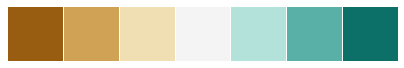

In [31]:
sns.palplot(sns.color_palette("BrBG", 7))

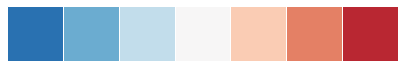

In [32]:
sns.palplot(sns.color_palette("RdBu_r", 7))

Another good choice that is built into matplotlib is the ``coolwarm`` palette. Note that this colormap has less contrast between the middle values and the extremes.

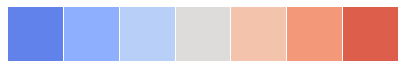

In [33]:
sns.palplot(sns.color_palette("coolwarm", 7))

**Custom diverging palettes with `diverging_palette`**

You can also use the seaborn function `diverging_palette` to create a custom colormap for diverging data. (Naturally there is also a companion interactive widget, `choose_diverging_palette`). This function makes diverging palettes using the ``husl`` color system. You pass it two hues (in degreees) and, optionally, the lightness and saturation values for the extremes. Using ``husl`` means that the extreme values, and the resulting ramps to the midpoint, will be well-balanced

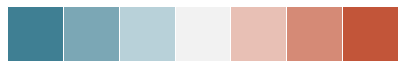

In [34]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

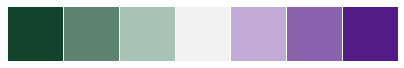

In [35]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

The ``sep`` argument controls the width of the separation between the two ramps in the middle region of the palette.

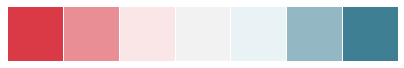

In [36]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

It's also possible to make a palette with the midpoint is dark rather than light.

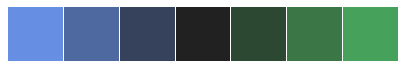

In [37]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

Changing default palettes with `set_palette`
--------------------------------------------------

The `color_palette` function has a companion called `set_palette`. The relationship between them is similar to the pairs covered in the aesthetics tutorial. `set_palette` accepts the same arguments as `color_palette`, but it changes the default matplotlib parameters so that the palette is used for all plots.

In [38]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

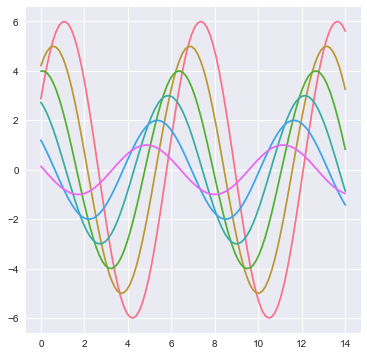

In [39]:
sns.set_palette("husl")
sinplot()

The `color_palette` function can also be used in a ``with`` statement to temporarily change the color palette.

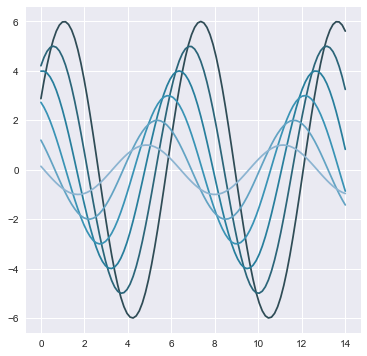

In [40]:
with sns.color_palette("PuBuGn_d"):
    sinplot()